In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load Wine dataset
data = load_wine()
X, y = data.data, data.target


In [2]:
# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Baseline Model (No PCA):

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Baseline Accuracy: {accuracy}")
print(f"Baseline Precision: {precision}")
print(f"Baseline Recall: {recall}")

Baseline Accuracy: 1.0
Baseline Precision: 1.0
Baseline Recall: 1.0


Apply PCA:

In [4]:
from sklearn.decomposition import PCA

# Apply PCA with different numbers of components
n_components = [2, 5, 10]
X_train_pca_list = []
X_test_pca_list = []

for n in n_components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    X_train_pca_list.append(X_train_pca)
    X_test_pca_list.append(X_test_pca)

Train and Evaluate with PCA:

In [5]:
for i, n in enumerate(n_components):
    model_pca = LogisticRegression(max_iter=10000)
    model_pca.fit(X_train_pca_list[i], y_train)

    y_pred_pca = model_pca.predict(X_test_pca_list[i])
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

    print(f"\nPCA with {n} components:")
    print(f"Accuracy: {accuracy_pca}")
    print(f"Precision: {precision_pca}")
    print(f"Recall: {recall_pca}")


PCA with 2 components:
Accuracy: 0.6851851851851852
Precision: 0.6652503293807642
Recall: 0.6851851851851852

PCA with 5 components:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

PCA with 10 components:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


**Visualization:**

In [6]:
accuracies = []

for i, n in enumerate(n_components):
    # Create a new instance of LogisticRegression for each iteration
    model_pca = LogisticRegression(max_iter=10000)

    # Train the model with the corresponding number of PCA components
    model_pca.fit(X_train_pca_list[i], y_train)

    # Predict on the test set projected onto the same PCA components
    y_pred_pca = model_pca.predict(X_test_pca_list[i])

    # Calculate accuracy and store it
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    accuracies.append(accuracy_pca)

    # Print performance metrics for each PCA component count
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

    print(f"\nPCA with {n} components:")
    print(f"Accuracy: {accuracy_pca}")
    print(f"Precision: {precision_pca}")
    print(f"Recall: {recall_pca}")


PCA with 2 components:
Accuracy: 0.6851851851851852
Precision: 0.6652503293807642
Recall: 0.6851851851851852

PCA with 5 components:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

PCA with 10 components:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


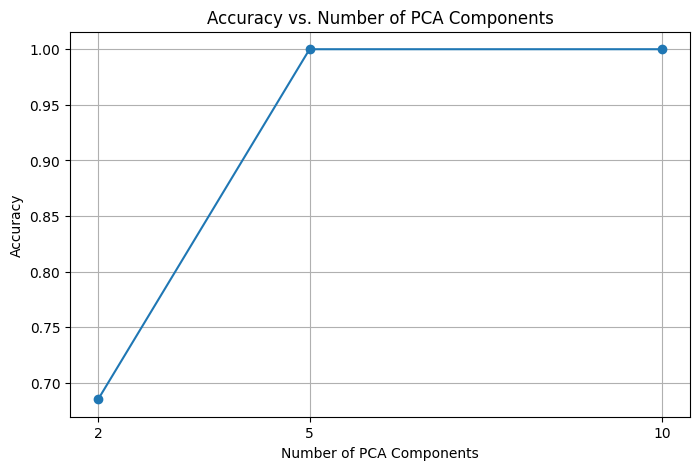

In [7]:

# Visualization: Plot accuracy against the number of components
plt.figure(figsize=(8, 5))
plt.plot(n_components, accuracies, marker='o')
plt.title('Accuracy vs. Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Accuracy')
plt.xticks(n_components)
plt.grid()
plt.show()